In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:43339")
client

<Client: 'tcp://127.0.0.1:43339' processes=4 threads=16, memory=46.88 GiB>

In [2]:
import xarray as xr
from pathlib import Path
import tqdm
from matplotlib import pyplot as plt

In [3]:
zarr_stores = sorted(Path(
    "/home/jovyan/shared_materials/2025-02_climate_attribution_data/zarr/"
).glob("*.zarr"))

zarr_stores

[PosixPath('/home/jovyan/shared_materials/2025-02_climate_attribution_data/zarr/pr_AFR-22_CCCma-CanESM2_CCCma-CanRCM4.zarr'),
 PosixPath('/home/jovyan/shared_materials/2025-02_climate_attribution_data/zarr/pr_AFR-22_MOHC-HadGEM2-ES_CLMcom-KIT-CCLM5-0-15.zarr'),
 PosixPath('/home/jovyan/shared_materials/2025-02_climate_attribution_data/zarr/pr_AFR-22_MPI-M-MPI-ESM-LR_CLMcom-KIT-CCLM5-0-15.zarr'),
 PosixPath('/home/jovyan/shared_materials/2025-02_climate_attribution_data/zarr/pr_AFR-22_MPI-M-MPI-ESM-LR_GERICS-REMO2015.zarr'),
 PosixPath('/home/jovyan/shared_materials/2025-02_climate_attribution_data/zarr/pr_AFR-22_NCC-NorESM1-M_CLMcom-KIT-CCLM5-0-15.zarr'),
 PosixPath('/home/jovyan/shared_materials/2025-02_climate_attribution_data/zarr/pr_AFR-22_NCC-NorESM1-M_GERICS-REMO2015.zarr'),
 PosixPath('/home/jovyan/shared_materials/2025-02_climate_attribution_data/zarr/pr_EUR-11_CCCma-CanESM2_CLMcom-CCLM4-8-17.zarr'),
 PosixPath('/home/jovyan/shared_materials/2025-02_climate_attribution_data/zar

27it [09:10, 20.40s/it]


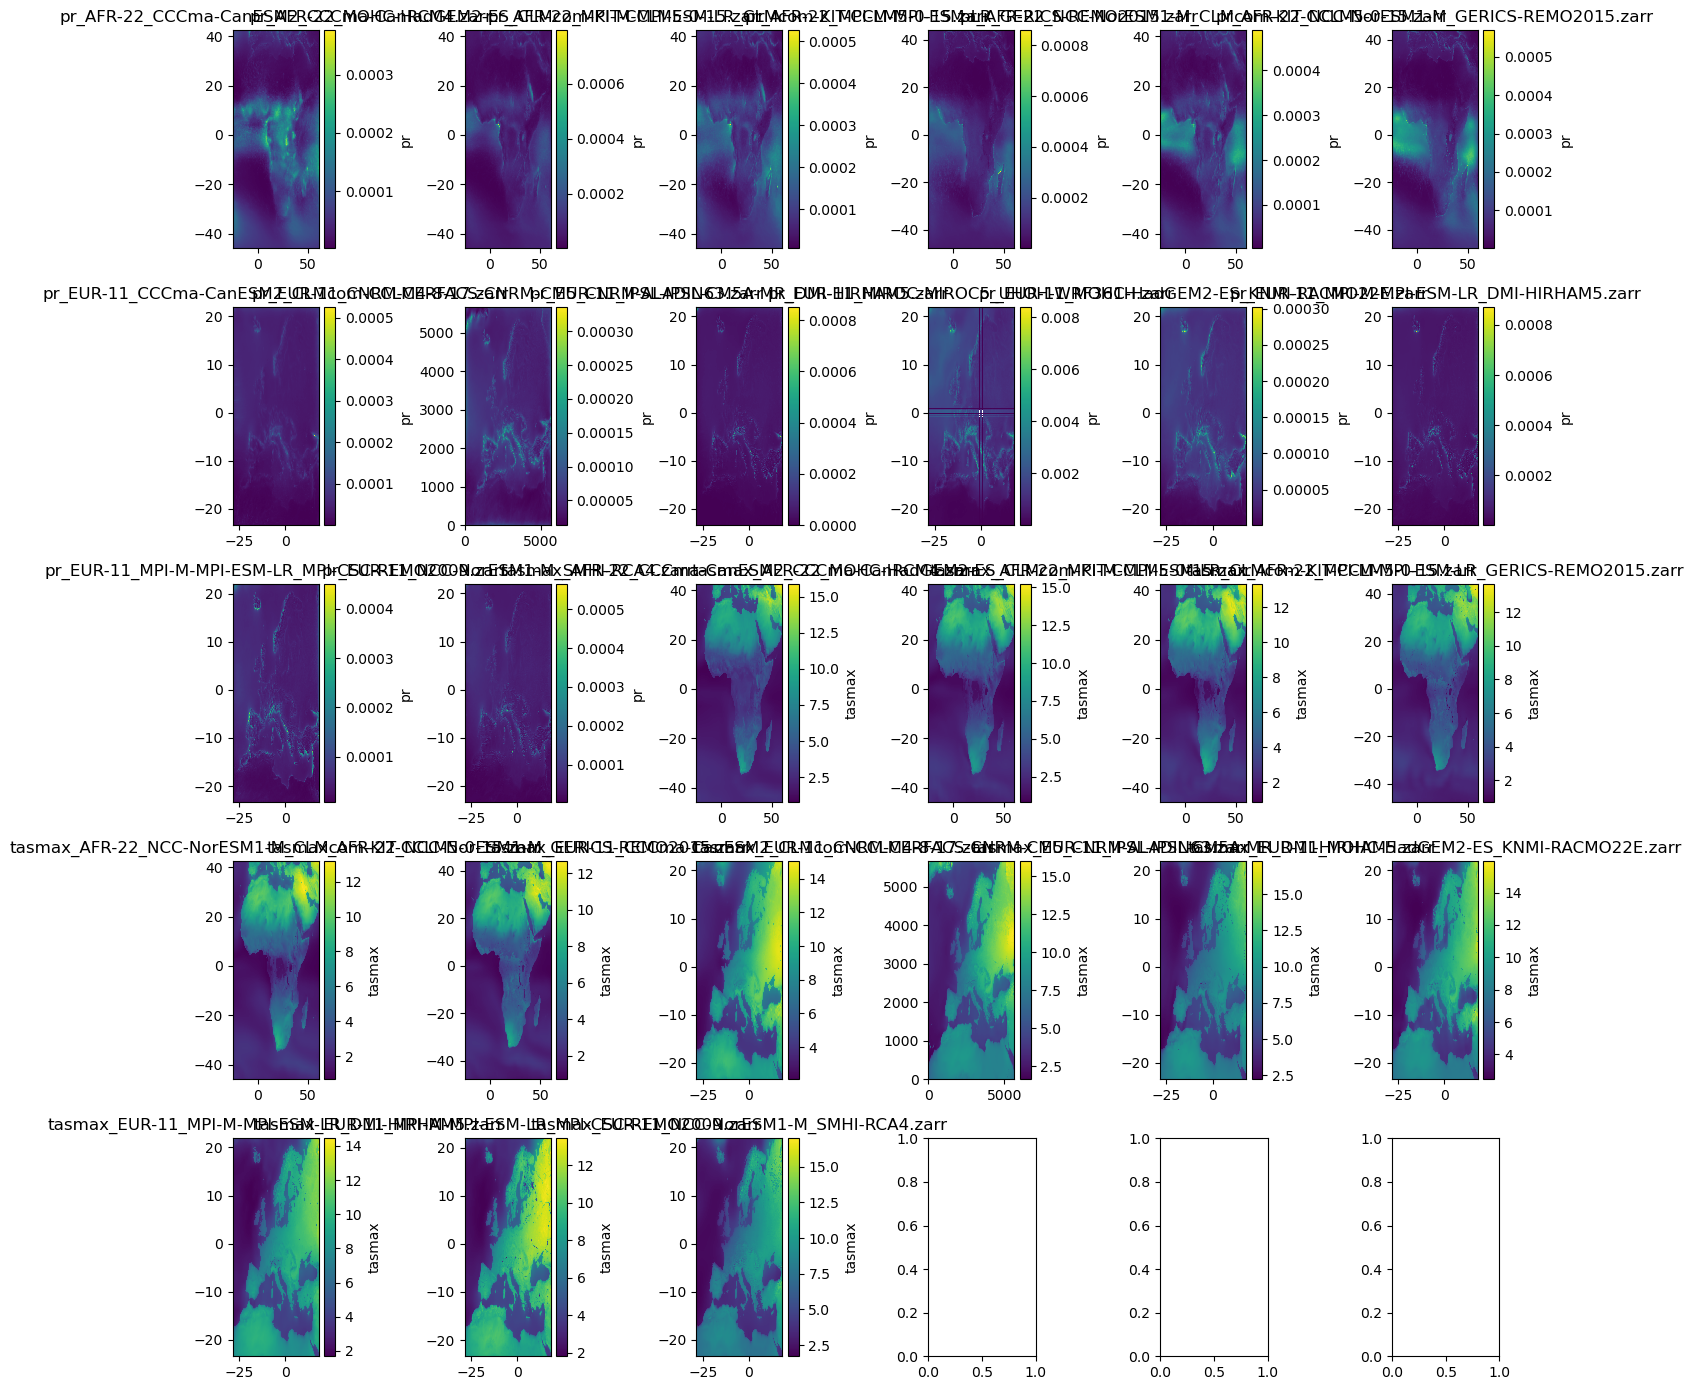

In [4]:
fig, ax = plt.subplots(5, 6, figsize=(14, 14))

for _ax, s in tqdm.tqdm(zip(ax.flatten(), zarr_stores)):
    ds = xr.open_zarr(s)
    varname = s.name.split("_")[0]
    ds[varname].std("time").plot(ax=_ax)
    _ax.set_xlabel("")
    _ax.set_ylabel("")
    _ax.set_title(s.name)

fig.tight_layout()

27it [06:35, 14.65s/it]


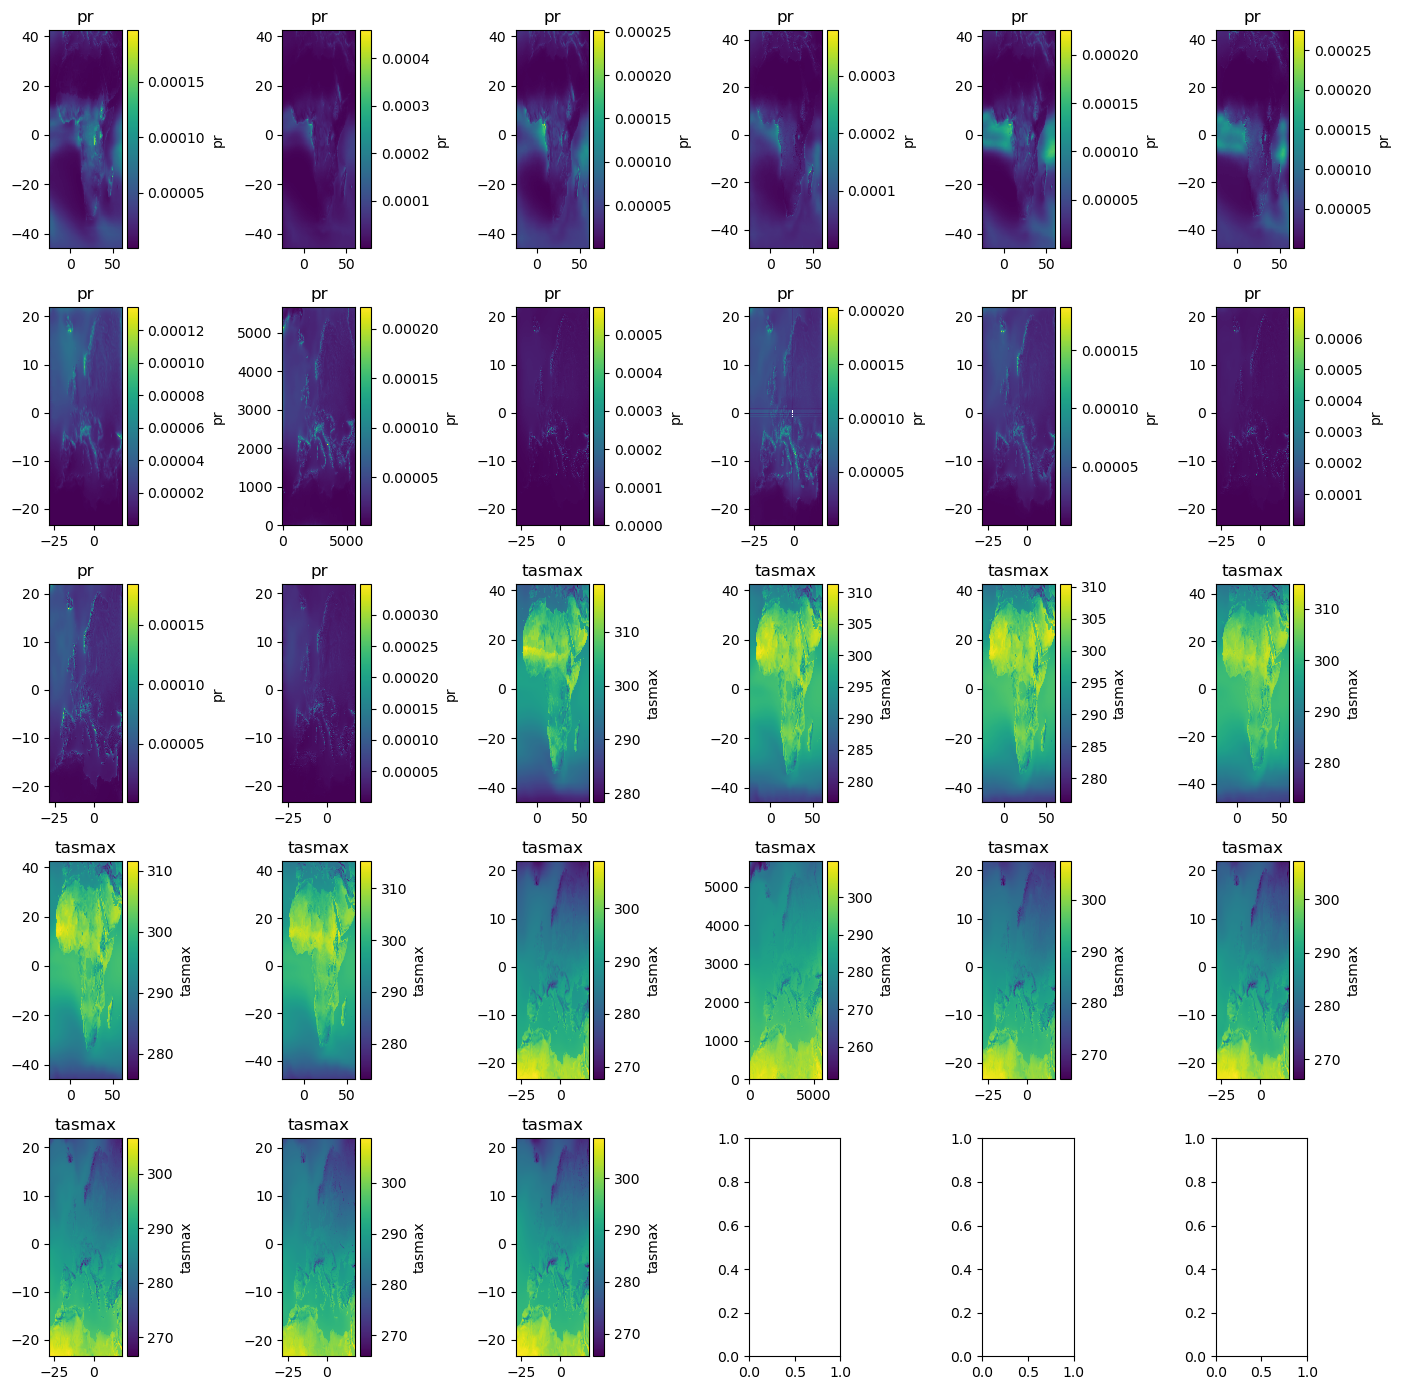

In [5]:
fig, ax = plt.subplots(5, 6, figsize=(14, 14))

for _ax, s in tqdm.tqdm(zip(ax.flatten(), zarr_stores)):
    ds = xr.open_zarr(s)
    varname = s.name.split("_")[0]
    ds[varname].mean("time").plot(ax=_ax)
    _ax.set_xlabel("")
    _ax.set_ylabel("")
    _ax.set_title(varname)

fig.tight_layout()